In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import glob
pd.set_option('display.max_columns',40)
pd.set_option('display.max_rows', 300)  # Show all rows

os.chdir('/content/drive/MyDrive/Real_Trader_EDA_R1/ES_5min_data/Machine_Learning_Model/Defence_Profit_Loss_calculated/')
# Path to your data folder in Google Drive
data_folder = '/content/drive/MyDrive/Real_Trader_EDA_R1/ES_5min_data/Machine_Learning_Model/Defence_Profit_Loss_calculated'

# List files in the specified folder to confirm access
folder_path = os.path.join(data_folder)  # Updateh
file_list = os.listdir(folder_path)
file_list

['trade_data_defence_profit_loss_data.csv',
 'cal_data_defence_profit_loss_data.csv',
 'ideal_data_defence_profit_loss_data.csv']

In [ ]:
trade_data = pd.read_csv("trade_data_defence_profit_loss_data.csv")
cal_data = pd.read_csv("cal_data_defence_profit_loss_data.csv")  #cal data
ideal_data = pd.read_csv("ideal_data_defence_profit_loss_data.csv")  #ideal

In [ ]:
def calculate_correlation_matrix(data):
    # Select only the numerical columns
    numerical_cols = data.select_dtypes(include=['float64']).columns

    # Create the correlation matrix
    corr_matrix = data[numerical_cols].corr()

    return corr_matrix

# Example usage:
corr_matrix_t = calculate_correlation_matrix(trade_data)

In [ ]:
corr_matrix_t

,Open,High,Low,Close,SellersLevel4,SellersLevel3,SellersLevel2,SellersLevel1,SellersLevel0,BuyersLevel0,BuyersLevel1,BuyersLevel2,BuyersLevel3,BuyersLevel4,BuyersInControlPrice,SellersInControlPrice,Entry_T,Defence_T,Stop_T,Target_T,Profit_T,defence_target_T,D_Profit_T,D_Loss_T
Open,1.000000,0.999978,0.999995,0.999979,0.758108,0.786741,0.818937,0.858443,0.907338,0.995247,0.992454,0.989820,0.987739,0.985068,0.088874,0.074925,0.140073,0.140082,0.140079,0.140106,-0.050504,0.140646,-0.010686,0.009342
High,0.999978,1.000000,0.999972,0.999995,0.758299,0.786901,0.819063,0.858529,0.907380,0.995207,0.992405,0.989765,0.987676,0.984999,0.090207,0.076524,0.142581,0.142590,0.142587,0.142613,-0.048075,0.142918,-0.009999,0.009877
Low,0.999995,0.999972,1.000000,0.999980,0.758050,0.786694,0.818900,0.858418,0.907326,0.995253,0.992463,0.989829,0.987749,0.985080,0.089392,0.075323,0.140857,0.140866,0.140863,0.140890,-0.050376,0.141417,-0.010646,0.009374
Close,0.999979,0.999995,0.999980,1.000000,0.758242,0.786857,0.819030,0.858508,0.907372,0.995219,0.992423,0.989784,0.987698,0.985026,0.090614,0.076872,0.143226,0.143234,0.143232,0.143258,-0.048032,0.143567,-0.010022,0.009883
SellersLevel4,0.758108,0.758299,0.758050,0.758242,1.000000,0.963153,0.925023,0.882336,0.835171,0.754331,0.752176,0.750224,0.748626,0.746563,0.083434,0.099280,0.156008,0.156026,0.156027,0.156027,-0.010702,0.153587,0.000575,0.013318
SellersLevel3,0.786741,0.786901,0.786694,0.786857,0.963153,1.000000,0.960343,0.915949,0.866898,0.782879,0.780654,0.778640,0.776989,0.774859,0.087620,0.095423,0.156355,0.156369,0.156370,0.156376,-0.015113,0.154283,-0.000956,0.013104
SellersLevel2,0.818937,0.819063,0.818900,0.819030,0.925023,0.960343,1.000000,0.953698,0.902541,0.814967,0.812665,0.810581,0.808873,0.806667,0.090877,0.091644,0.155965,0.155977,0.155976,0.155988,-0.020461,0.154300,-0.002607,0.012702
SellersLevel1,0.858443,0.858529,0.858418,0.858508,0.882336,0.915949,0.953698,1.000000,0.946264,0.854329,0.851934,0.849765,0.847987,0.845691,0.094097,0.087201,0.154980,0.154989,0.154988,0.155006,-0.026829,0.153869,-0.004547,0.011833
SellersLevel0,0.907338,0.907380,0.907326,0.907372,0.835171,0.866898,0.902541,0.946264,1.000000,0.903029,0.900514,0.898144,0.896279,0.893870,0.093661,0.082249,0.150408,0.150416,0.150414,0.150437,-0.035214,0.149962,-0.006769,0.010647
BuyersLevel0,0.995247,0.995207,0.995253,0.995219,0.754331,0.782879,0.814967,0.854329,0.903029,1.000000,0.997165,0.994499,0.992391,0.989690,0.089099,0.074667,0.140050,0.140059,0.140056,0.140083,-0.050925,0.140635,-0.010692,0.009284


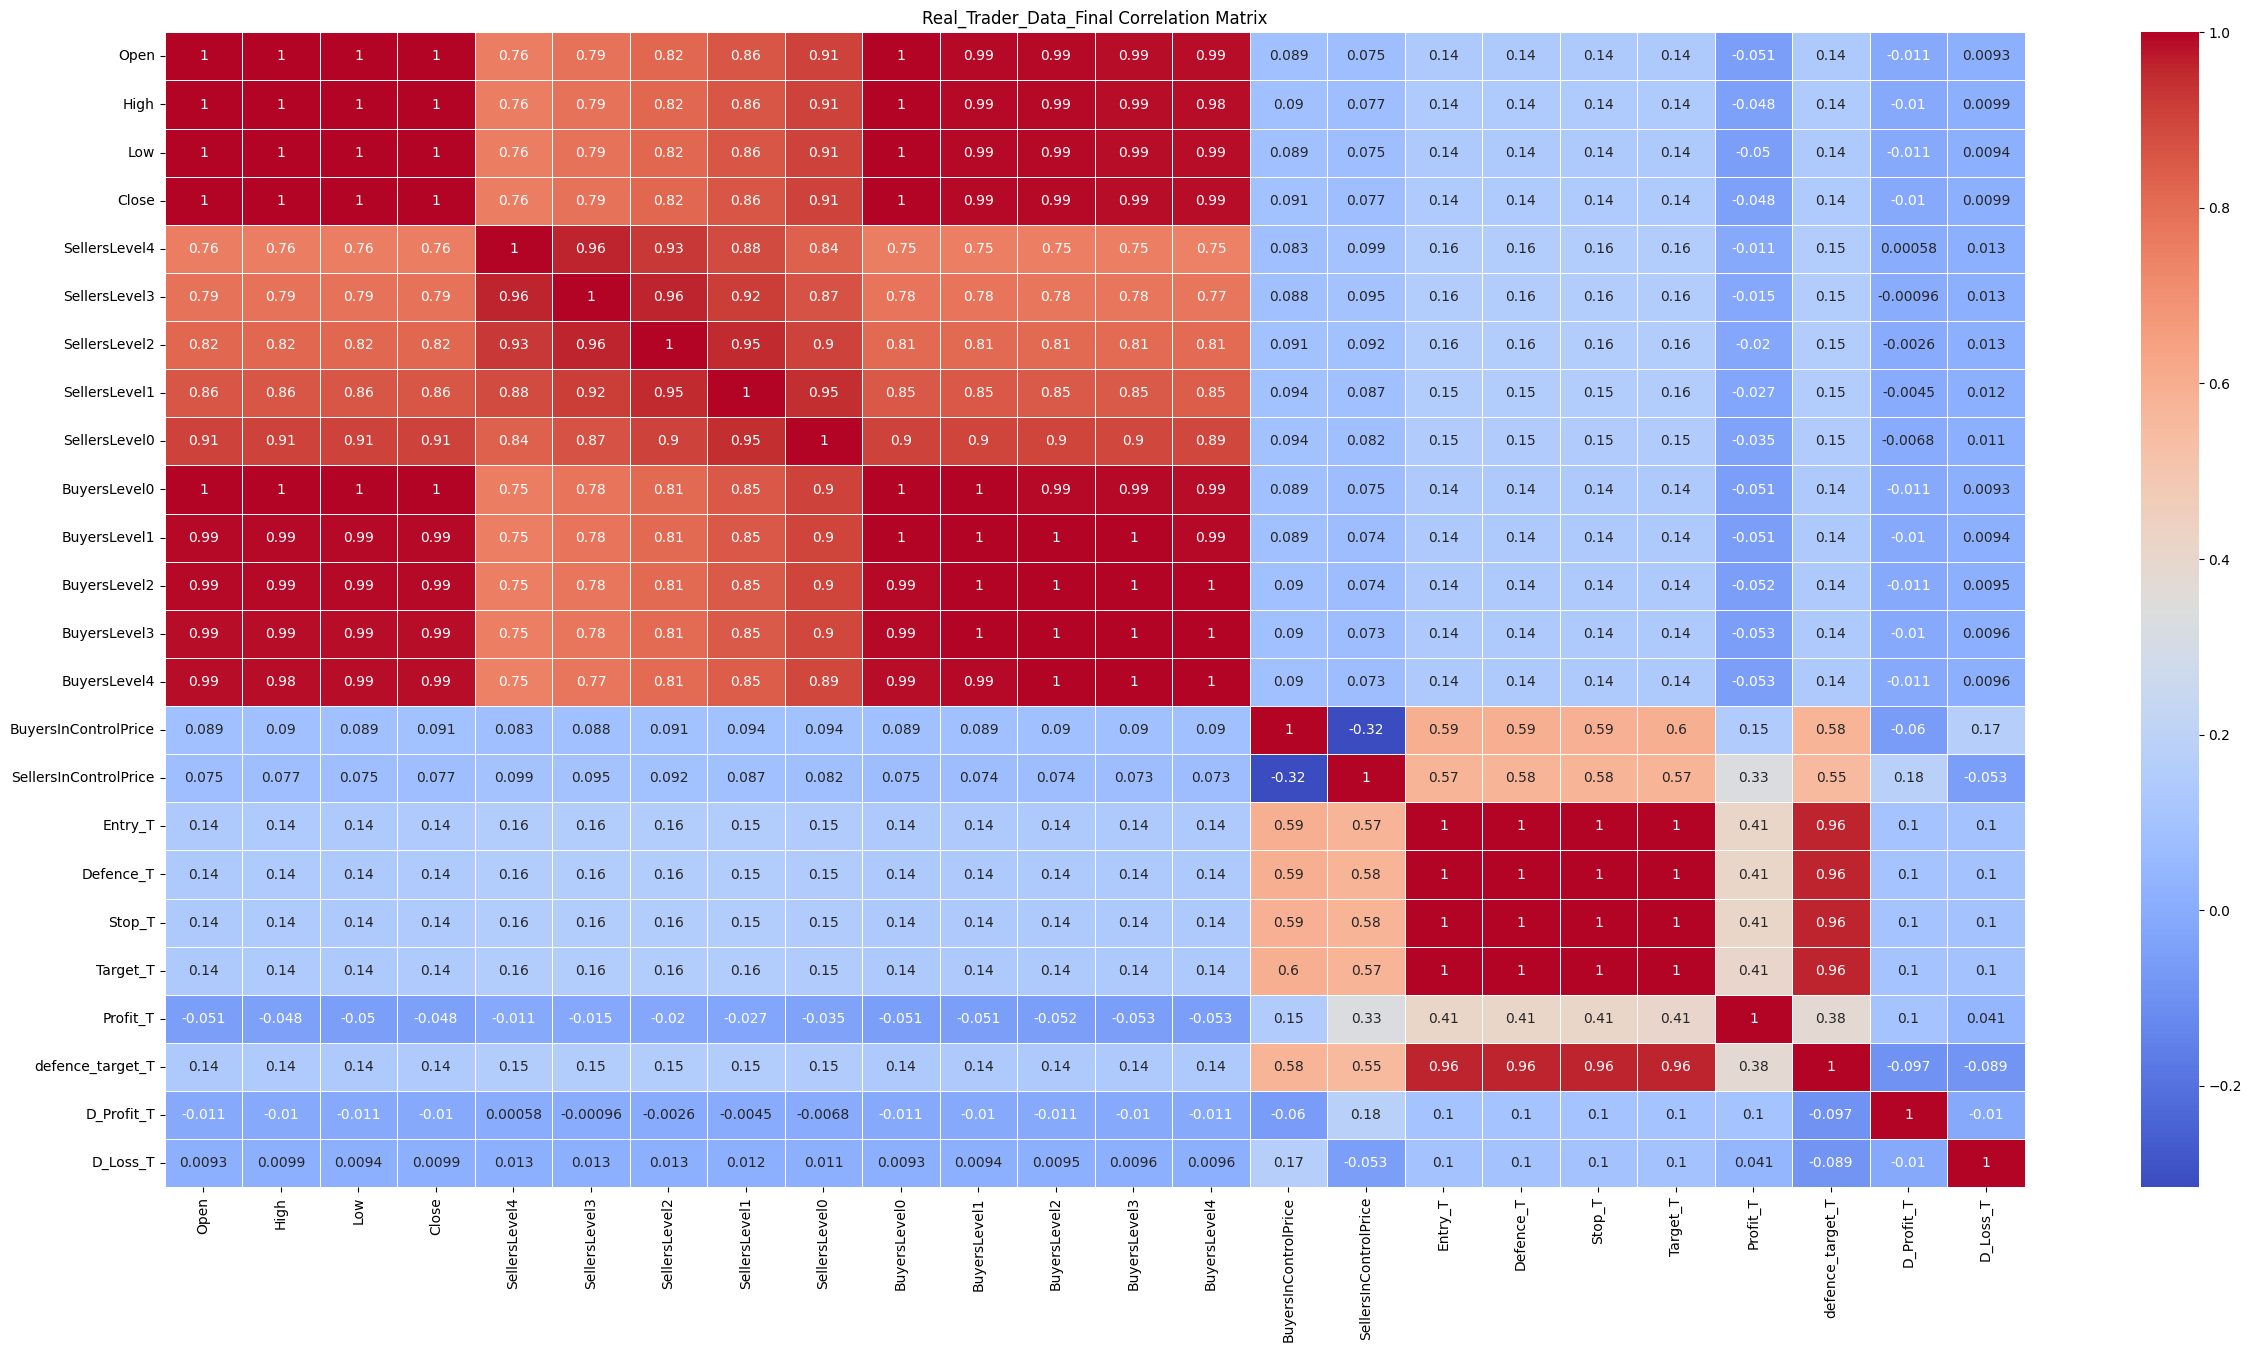

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def create_correlation_matrix(df, title="Real_Trader_Data_Correlation Matrix"):
    # Select only the numerical columns
    numerical_cols = df.select_dtypes(include=['float64']).columns

    # Create the correlation matrix
    corr_matrix = df[numerical_cols].corr()

    # Create the heatmap
    plt.figure(figsize=(30, 15))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title(title)
    plt.show()

# Example usage:
create_correlation_matrix(trade_data, "Real_Trader_Data_Final Correlation Matrix")

In [ ]:
def calculate_correlation_matrix(data):
    # Select only the numerical columns
    numerical_cols = data.select_dtypes(include=['float64']).columns

    # Create the correlation matrix
    corr_matrix = data[numerical_cols].corr()

    return corr_matrix

# Example usage:
corr_matrix_t = calculate_correlation_matrix(cal_data)
corr_matrix_t

,Open,High,Low,Close,SellersLevel4,SellersLevel3,SellersLevel2,SellersLevel1,SellersLevel0,BuyersLevel0,BuyersLevel1,BuyersLevel2,BuyersLevel3,BuyersLevel4,BuyersInControlPrice,SellersInControlPrice,Entry_C,Defence_C,Stop_C,Target_C,defence_target_C,D_Profit_C,D_Loss_C
Open,1.000000,0.999978,0.999995,0.999979,0.758108,0.786741,0.818937,0.858443,0.907338,0.995247,0.992454,0.989820,0.987739,0.985068,0.088874,0.074925,0.140107,0.140105,0.140104,0.140110,0.138921,-0.015271,0.020280
High,0.999978,1.000000,0.999972,0.999995,0.758299,0.786901,0.819063,0.858529,0.907380,0.995207,0.992405,0.989765,0.987676,0.984999,0.090207,0.076524,0.142612,0.142610,0.142609,0.142615,0.141105,-0.014558,0.021047
Low,0.999995,0.999972,1.000000,0.999980,0.758050,0.786694,0.818900,0.858418,0.907326,0.995253,0.992463,0.989829,0.987749,0.985080,0.089392,0.075323,0.140891,0.140889,0.140888,0.140895,0.139691,-0.015222,0.020304
Close,0.999979,0.999995,0.999980,1.000000,0.758242,0.786857,0.819030,0.858508,0.907372,0.995219,0.992423,0.989784,0.987698,0.985026,0.090614,0.076872,0.143257,0.143256,0.143254,0.143260,0.141756,-0.014580,0.021048
SellersLevel4,0.758108,0.758299,0.758050,0.758242,1.000000,0.963153,0.925023,0.882336,0.835171,0.754331,0.752176,0.750224,0.748626,0.746563,0.083434,0.099280,0.156073,0.156077,0.156081,0.156065,0.151988,-0.002607,0.021559
SellersLevel3,0.786741,0.786901,0.786694,0.786857,0.963153,1.000000,0.960343,0.915949,0.866898,0.782879,0.780654,0.778640,0.776989,0.774859,0.087620,0.095423,0.156409,0.156412,0.156414,0.156404,0.152417,-0.004316,0.022701
SellersLevel2,0.818937,0.819063,0.818900,0.819030,0.925023,0.960343,1.000000,0.953698,0.902541,0.814967,0.812665,0.810581,0.808873,0.806667,0.090877,0.091644,0.156011,0.156012,0.156013,0.156008,0.152501,-0.006160,0.022276
SellersLevel1,0.858443,0.858529,0.858418,0.858508,0.882336,0.915949,0.953698,1.000000,0.946264,0.854329,0.851934,0.849765,0.847987,0.845691,0.094097,0.087201,0.155017,0.155017,0.155017,0.155018,0.152069,-0.008338,0.021806
SellersLevel0,0.907338,0.907380,0.907326,0.907372,0.835171,0.866898,0.902541,0.946264,1.000000,0.903029,0.900514,0.898144,0.896279,0.893870,0.093661,0.082249,0.150442,0.150441,0.150440,0.150444,0.148161,-0.010838,0.021126
BuyersLevel0,0.995247,0.995207,0.995253,0.995219,0.754331,0.782879,0.814967,0.854329,0.903029,1.000000,0.997165,0.994499,0.992391,0.989690,0.089099,0.074667,0.140083,0.140081,0.140079,0.140086,0.138900,-0.015123,0.020134


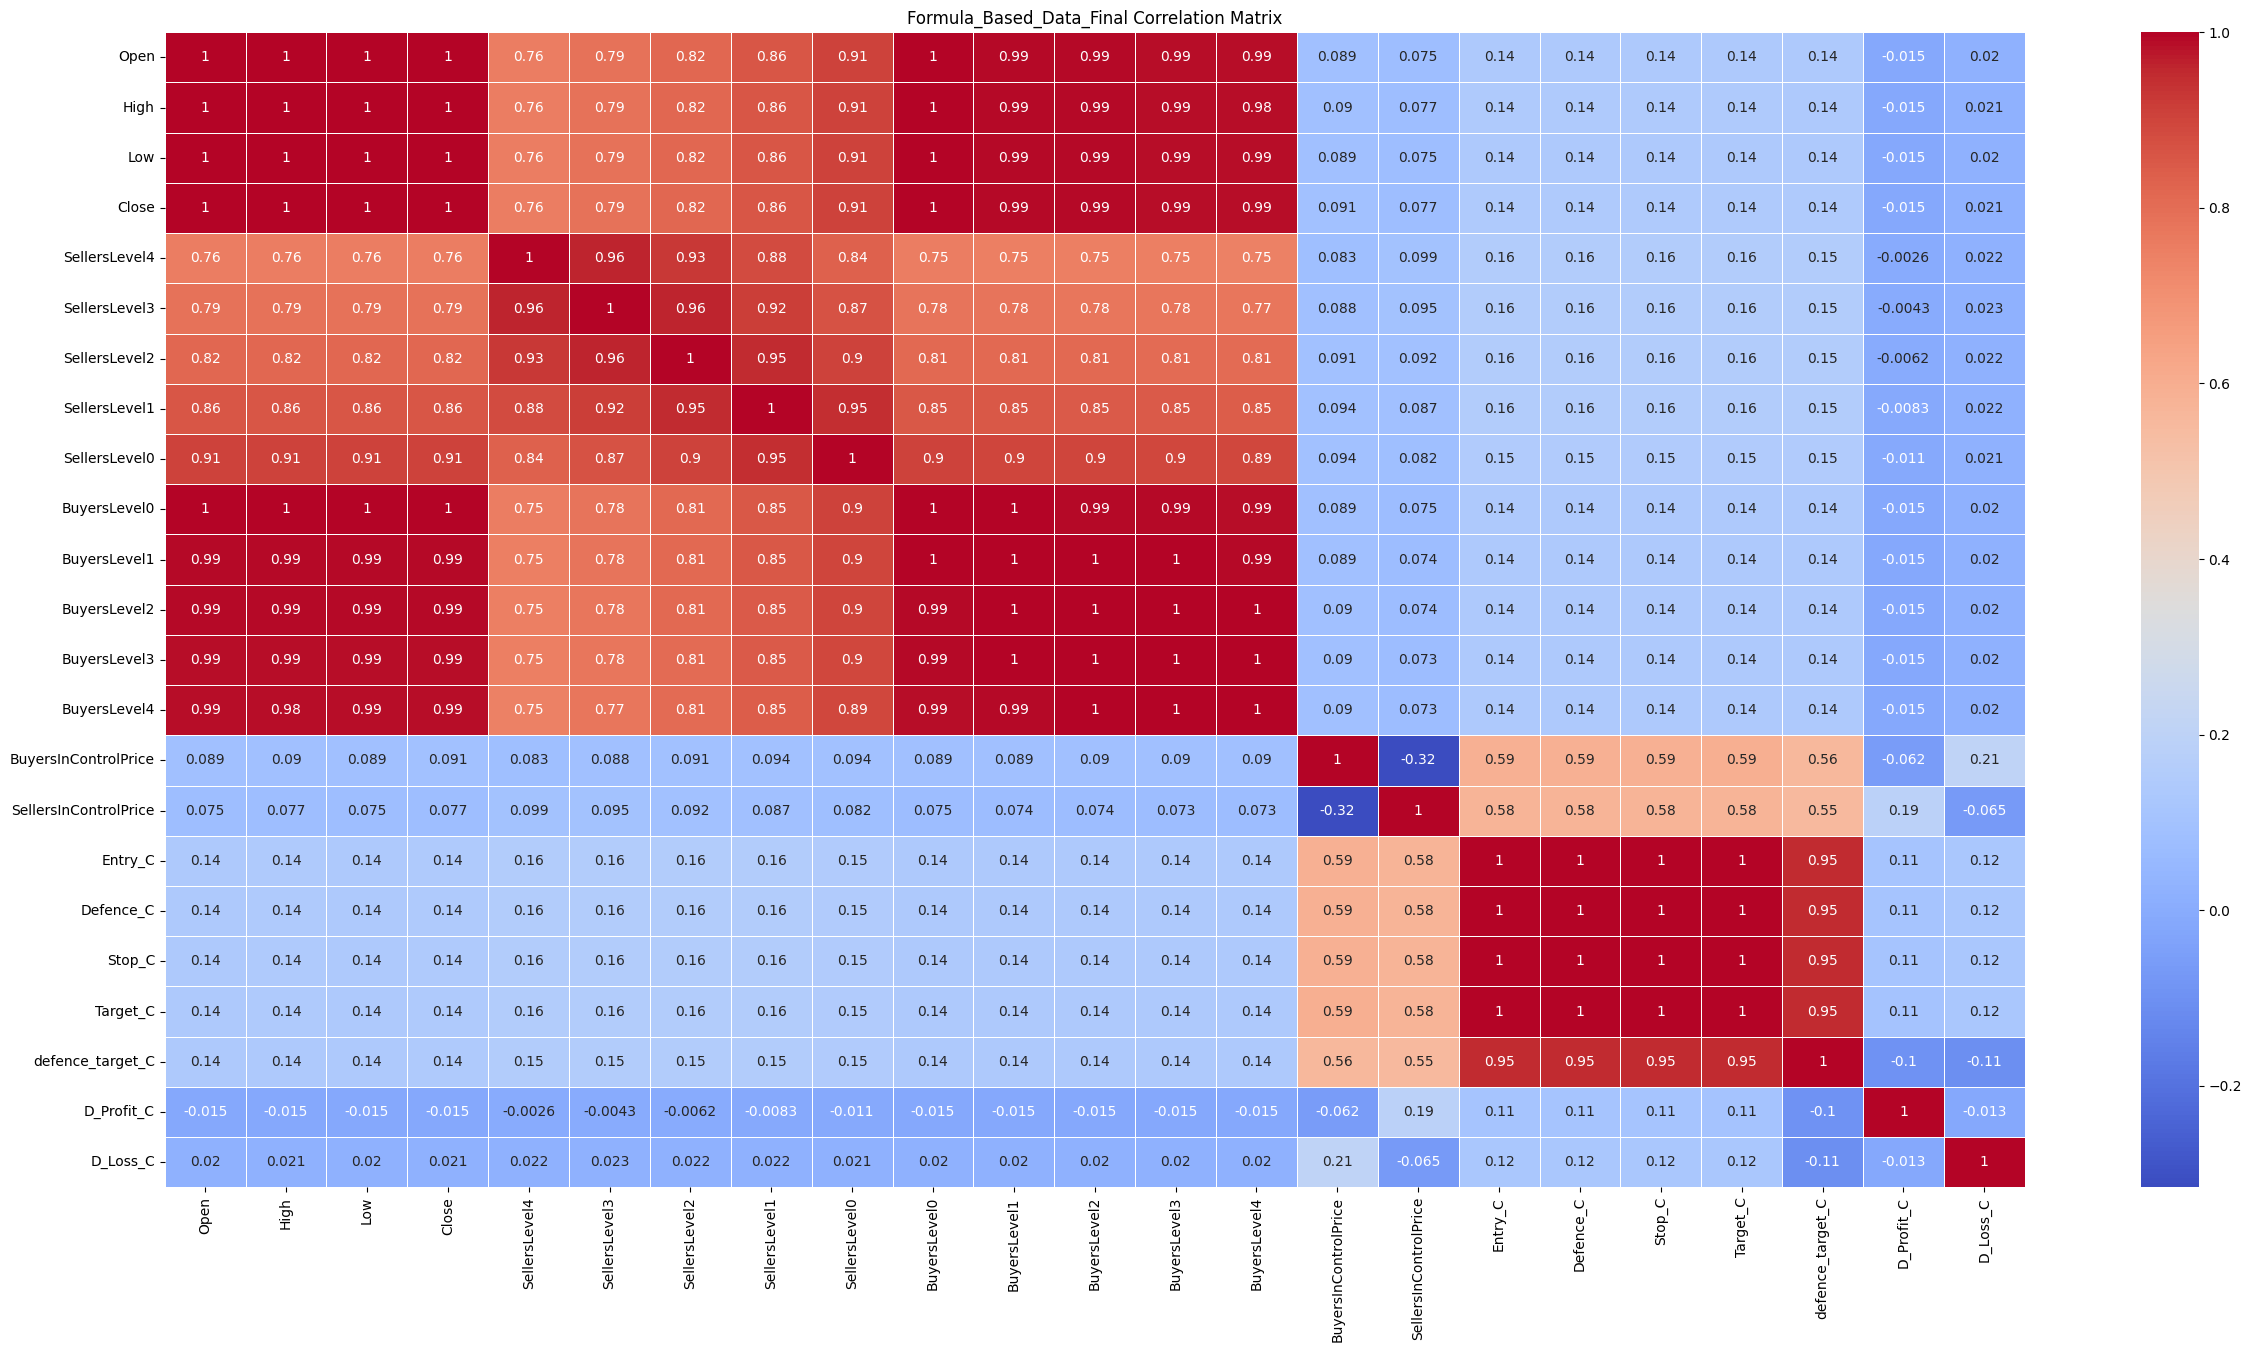

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def create_correlation_matrix(df, title="Formula_Based_Data_Correlation Matrix"):
    # Select only the numerical columns
    numerical_cols = df.select_dtypes(include=['float64']).columns

    # Create the correlation matrix
    corr_matrix = df[numerical_cols].corr()

    # Create the heatmap
    plt.figure(figsize=(30, 15))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title(title)
    plt.show()

# Example usage:
create_correlation_matrix(cal_data, "Formula_Based_Data_Final Correlation Matrix")

In [ ]:
def calculate_correlation_matrix(data):
    # Select only the numerical columns
    numerical_cols = data.select_dtypes(include=['float64']).columns

    # Create the correlation matrix
    corr_matrix = data[numerical_cols].corr()

    return corr_matrix

# Example usage:
corr_matrix_t = calculate_correlation_matrix(ideal_data)
corr_matrix_t

,Open,High,Low,Close,SellersLevel4,SellersLevel3,SellersLevel2,SellersLevel1,SellersLevel0,BuyersLevel0,BuyersLevel1,BuyersLevel2,BuyersLevel3,BuyersLevel4,BuyersInControlPrice,SellersInControlPrice,Entry,Defence,Stop,Target_Ideal,Profit_Ideal,Loss_Ideal,defence_target_Ideal,D_Profit_Ideal,D_Loss_Ideal
Open,1.000000,0.999978,0.999995,0.999979,0.758108,0.786741,0.818937,0.858443,0.907338,0.995247,0.992454,0.989820,0.987739,0.985068,0.088874,0.074925,0.140107,0.140105,0.140104,0.136911,-0.014696,0.021441,0.138921,-0.015271,0.020280
High,0.999978,1.000000,0.999972,0.999995,0.758299,0.786901,0.819063,0.858529,0.907380,0.995207,0.992405,0.989765,0.987676,0.984999,0.090207,0.076524,0.142612,0.142610,0.142609,0.139064,-0.013627,0.022184,0.141105,-0.014558,0.021047
Low,0.999995,0.999972,1.000000,0.999980,0.758050,0.786694,0.818900,0.858418,0.907326,0.995253,0.992463,0.989829,0.987749,0.985080,0.089392,0.075323,0.140891,0.140889,0.140888,0.137679,-0.014616,0.021489,0.139691,-0.015222,0.020304
Close,0.999979,0.999995,0.999980,1.000000,0.758242,0.786857,0.819030,0.858508,0.907372,0.995219,0.992423,0.989784,0.987698,0.985026,0.090614,0.076872,0.143257,0.143256,0.143254,0.139715,-0.013638,0.022204,0.141756,-0.014580,0.021048
SellersLevel4,0.758108,0.758299,0.758050,0.758242,1.000000,0.963153,0.925023,0.882336,0.835171,0.754331,0.752176,0.750224,0.748626,0.746563,0.083434,0.099280,0.156073,0.156077,0.156081,0.149519,0.001346,0.024272,0.151988,-0.002607,0.021559
SellersLevel3,0.786741,0.786901,0.786694,0.786857,0.963153,1.000000,0.960343,0.915949,0.866898,0.782879,0.780654,0.778640,0.776989,0.774859,0.087620,0.095423,0.156409,0.156412,0.156414,0.150253,-0.000531,0.024392,0.152417,-0.004316,0.022701
SellersLevel2,0.818937,0.819063,0.818900,0.819030,0.925023,0.960343,1.000000,0.953698,0.902541,0.814967,0.812665,0.810581,0.808873,0.806667,0.090877,0.091644,0.156011,0.156012,0.156013,0.150434,-0.002653,0.023837,0.152501,-0.006160,0.022276
SellersLevel1,0.858443,0.858529,0.858418,0.858508,0.882336,0.915949,0.953698,1.000000,0.946264,0.854329,0.851934,0.849765,0.847987,0.845691,0.094097,0.087201,0.155017,0.155017,0.155017,0.150083,-0.005283,0.023222,0.152069,-0.008338,0.021806
SellersLevel0,0.907338,0.907380,0.907326,0.907372,0.835171,0.866898,0.902541,0.946264,1.000000,0.903029,0.900514,0.898144,0.896279,0.893870,0.093661,0.082249,0.150442,0.150441,0.150440,0.146195,-0.008660,0.022388,0.148161,-0.010838,0.021126
BuyersLevel0,0.995247,0.995207,0.995253,0.995219,0.754331,0.782879,0.814967,0.854329,0.903029,1.000000,0.997165,0.994499,0.992391,0.989690,0.089099,0.074667,0.140083,0.140081,0.140079,0.136906,-0.014603,0.021362,0.138900,-0.015123,0.020134


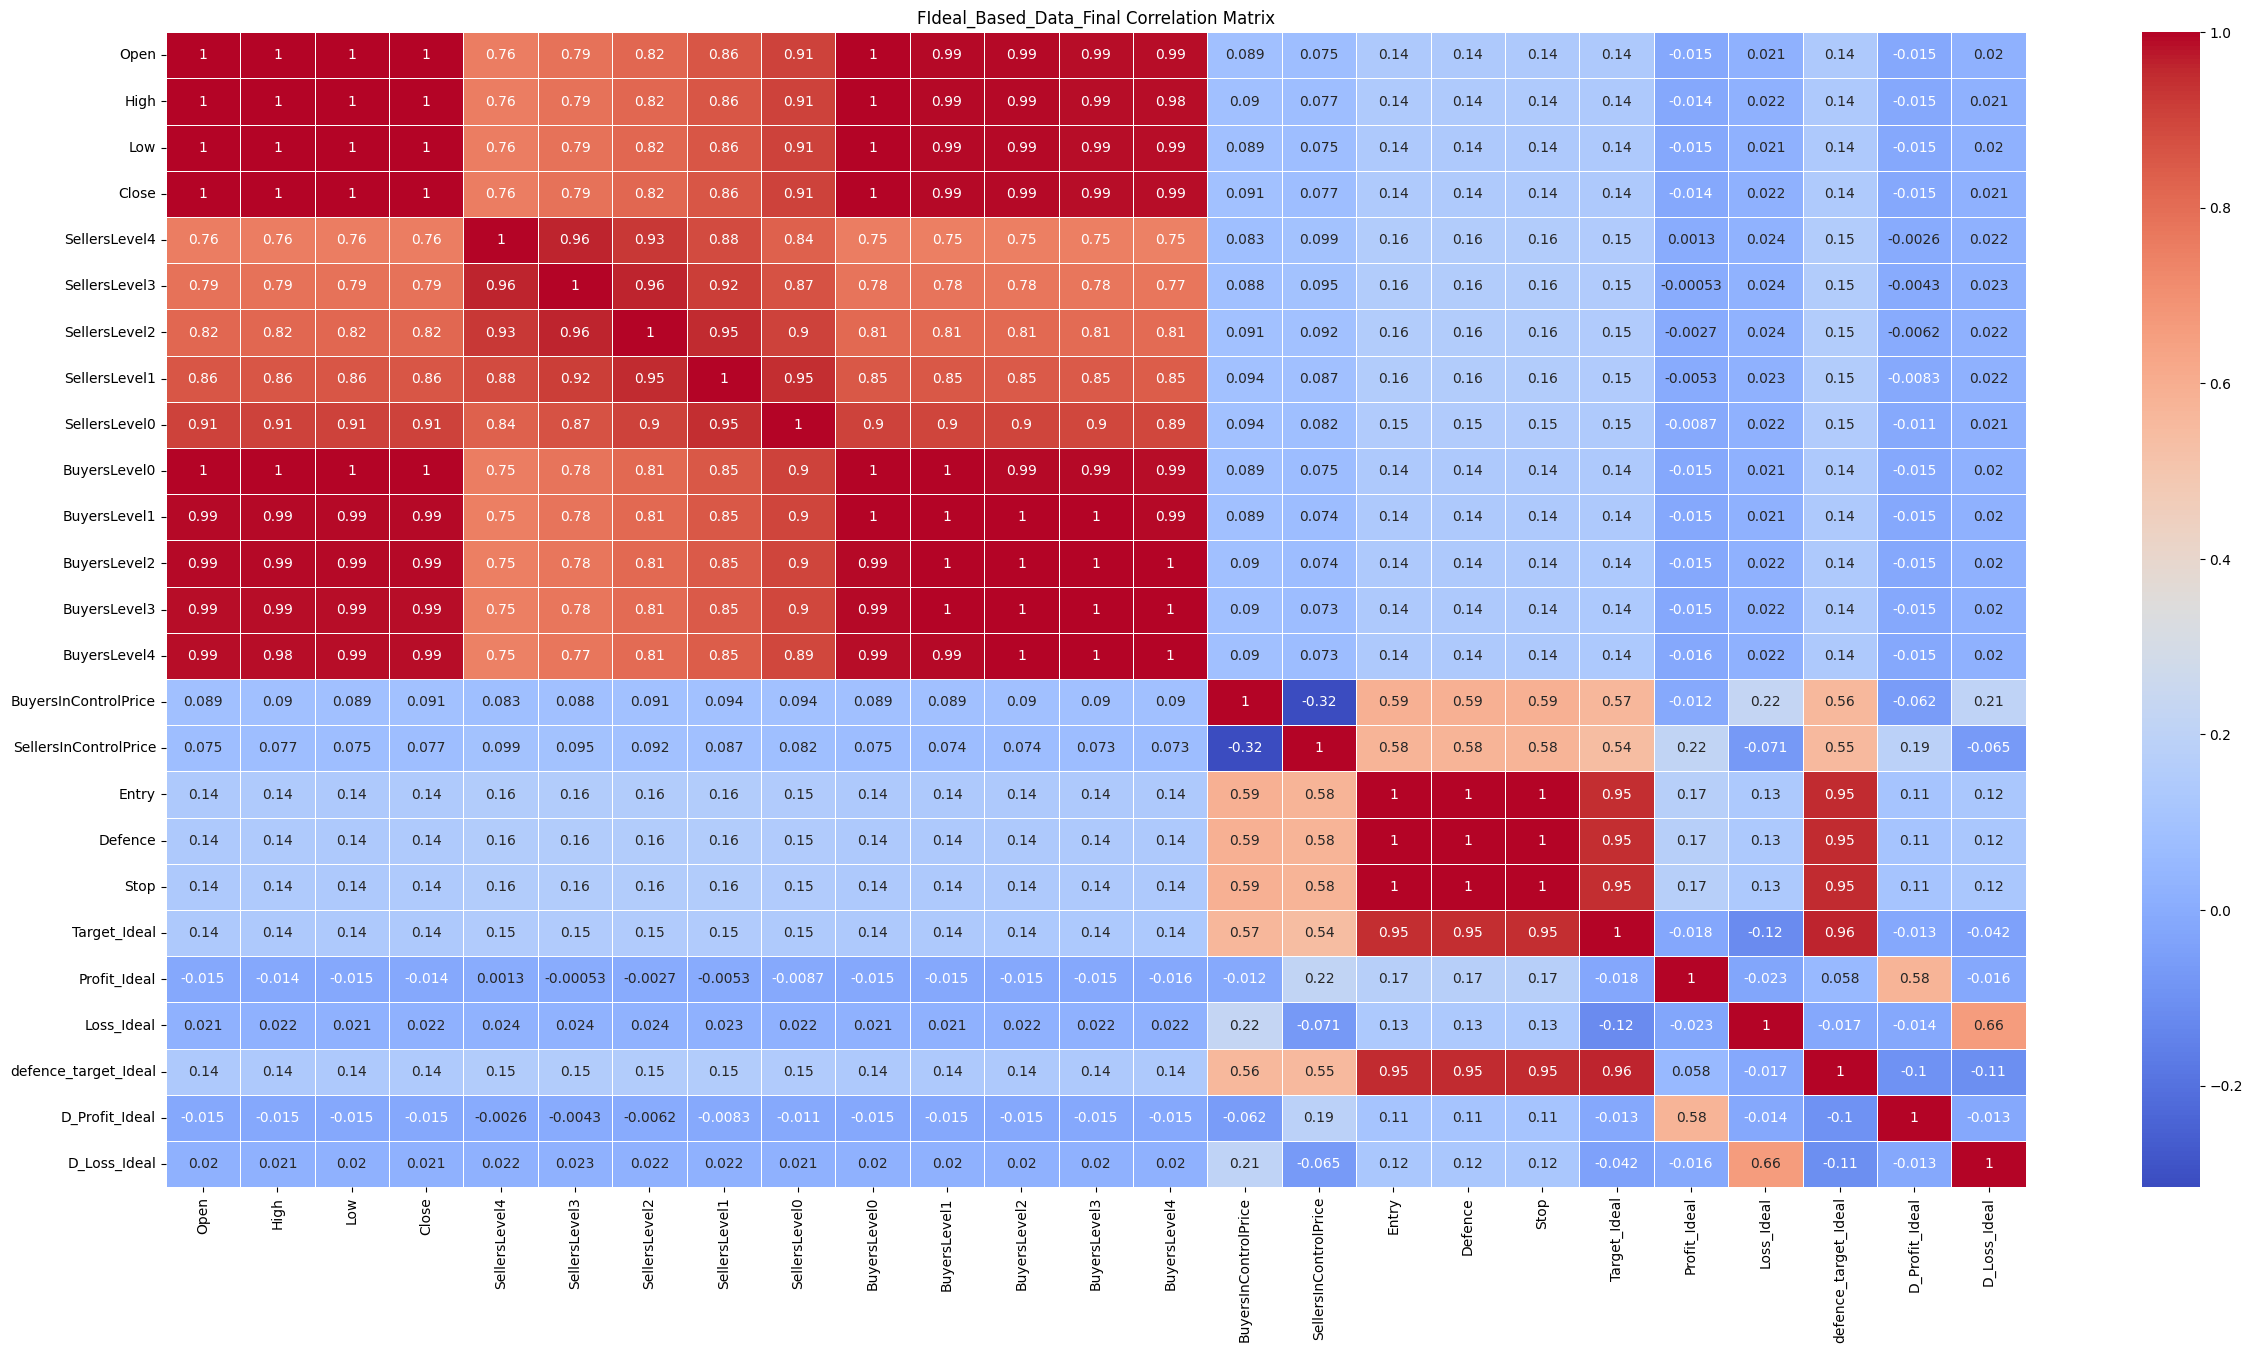

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def create_correlation_matrix(df, title="Ideal_Based_Data_Correlation Matrix"):
    # Select only the numerical columns
    numerical_cols = df.select_dtypes(include=['float64']).columns

    # Create the correlation matrix
    corr_matrix = df[numerical_cols].corr()

    # Create the heatmap
    plt.figure(figsize=(30, 15))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title(title)
    plt.show()

# Example usage:
create_correlation_matrix(ideal_data, "FIdeal_Based_Data_Final Correlation Matrix")

In [ ]:

# Function to process a single CSV file
def process_csv(file_path):
    # Read the CSV file
    df = pd.read_csv(file_path)

    # Check for unnamed columns and remove them if present
    unnamed_cols = df.columns.str.contains('^Unnamed')
    if unnamed_cols.any():
        df = df.loc[:, ~unnamed_cols]

    # Convert 'Time Stamp' column to datetime if it exists
    if 'Time Stamp' in df.columns:
        df['Time Stamp'] = pd.to_datetime(df['Time Stamp'])

    return df

# Paths to your CSV files
csv_files = ['trade_data_defence_profit_loss_data.csv', 'cal_data_defence_profit_loss_data.csv', 'ideal_data_defence_profit_loss_data.csv']

# Process each CSV file
processed_dataframes = [process_csv(file) for file in csv_files]
trade_data = processed_dataframes[0]
cal_data = processed_dataframes[1]
ideal_data = processed_dataframes[2]


In [ ]:
def format_datetime(x):
    if x == '0':
        return x
    else:
        return pd.to_datetime(x, format='%m/%d/%Y %H:%M')

trade_data['BuyersInControlTime'] = trade_data['BuyersInControlTime'].apply(format_datetime)
trade_data['SellersInControlTime'] = trade_data['SellersInControlTime'].apply(format_datetime)
cal_data['BuyersInControlTime'] = cal_data['BuyersInControlTime'].apply(format_datetime)
cal_data['SellersInControlTime'] = cal_data['SellersInControlTime'].apply(format_datetime)
ideal_data['BuyersInControlTime'] = ideal_data['BuyersInControlTime'].apply(format_datetime)
ideal_data['SellersInControlTime'] = ideal_data['SellersInControlTime'].apply(format_datetime)

In [ ]:
print(trade_data.columns)
print(cal_data.columns)
print(ideal_data.columns)

Index(['Time Stamp', 'Open', 'High', 'Low', 'Close', 'SellersLevel4',
       'SellersLevel3', 'SellersLevel2', 'SellersLevel1', 'SellersLevel0',
       'BuyersLevel0', 'BuyersLevel1', 'BuyersLevel2', 'BuyersLevel3',
       'BuyersLevel4', 'BuyersInControlTime', 'BuyersInControlPrice',
       'SellersInControlTime', 'SellersInControlPrice', 'Entry_T', 'Defence_T',
       'Stop_T', 'Target_T', 'Profit_T', 'Loss_T', 'defence_target_T',
       'D_Profit_T', 'D_Loss_T'],
      dtype='object')
Index(['Time Stamp', 'Open', 'High', 'Low', 'Close', 'SellersLevel4',
       'SellersLevel3', 'SellersLevel2', 'SellersLevel1', 'SellersLevel0',
       'BuyersLevel0', 'BuyersLevel1', 'BuyersLevel2', 'BuyersLevel3',
       'BuyersLevel4', 'BuyersInControlTime', 'BuyersInControlPrice',
       'SellersInControlTime', 'SellersInControlPrice', 'Entry_C', 'Defence_C',
       'Stop_C', 'Target_C', 'Profit_C', 'Loss_C', 'defence_target_C',
       'D_Profit_C', 'D_Loss_C'],
      dtype='object')
Index(['Time S

In [ ]:
import pandas as pd

def prepare_final_data(cal_data, ideal_data, trade_data):
    # List of columns to drop
    columns_to_drop = [
        'Time Stamp', 'Open', 'High', 'Low', 'Close',
        'SellersLevel4', 'SellersLevel3', 'SellersLevel2',
        'SellersLevel1', 'SellersLevel0', 'BuyersLevel0',
        'BuyersLevel1', 'BuyersLevel2', 'BuyersLevel3',
        'BuyersLevel4', 'BuyersInControlTime', 'BuyersInControlPrice',
        'SellersInControlTime', 'SellersInControlPrice'
    ]

    # Drop unnecessary columns from cal_data
    cal_data.drop(columns=[col for col in columns_to_drop if col in cal_data.columns], inplace=True)

    # Drop unnecessary columns from ideal_data
    ideal_columns_to_drop = columns_to_drop + ['Entry', 'Defence', 'Stop']
    ideal_data.drop(columns=[col for col in ideal_columns_to_drop if col in ideal_data.columns], inplace=True)

    # Concatenate cal_data and ideal_data to the left of trade_data
    final_data = pd.concat([cal_data, ideal_data], axis=1)
    final_data = pd.concat([trade_data, final_data], axis=1)

    return final_data

# Example usage:
# final_data = prepare_final_data(cal_data, ideal_data, trade_data)


In [ ]:
final_data = prepare_final_data(cal_data, ideal_data, trade_data)

In [ ]:
final_data.columns

Index(['Time Stamp', 'Open', 'High', 'Low', 'Close', 'SellersLevel4',
       'SellersLevel3', 'SellersLevel2', 'SellersLevel1', 'SellersLevel0',
       'BuyersLevel0', 'BuyersLevel1', 'BuyersLevel2', 'BuyersLevel3',
       'BuyersLevel4', 'BuyersInControlTime', 'BuyersInControlPrice',
       'SellersInControlTime', 'SellersInControlPrice', 'Entry_T', 'Defence_T',
       'Stop_T', 'Target_T', 'Profit_T', 'Loss_T', 'defence_target_T',
       'D_Profit_T', 'D_Loss_T', 'Entry_C', 'Defence_C', 'Stop_C', 'Target_C',
       'Profit_C', 'Loss_C', 'defence_target_C', 'D_Profit_C', 'D_Loss_C',
       'Target_Ideal', 'Profit_Ideal', 'Loss_Ideal', 'defence_target_Ideal',
       'D_Profit_Ideal', 'D_Loss_Ideal'],
      dtype='object')

In [ ]:
def calculate_correlation_matrix(data):
    # Select only the numerical columns
    numerical_cols = data.select_dtypes(include=['float64']).columns

    # Create the correlation matrix
    corr_matrix = data[numerical_cols].corr()

    return corr_matrix

# Example usage:
corr_matrix_t = calculate_correlation_matrix(final_data)

In [ ]:
corr_matrix_t

,Open,High,Low,Close,SellersLevel4,SellersLevel3,SellersLevel2,SellersLevel1,SellersLevel0,BuyersLevel0,BuyersLevel1,BuyersLevel2,BuyersLevel3,BuyersLevel4,BuyersInControlPrice,SellersInControlPrice,Entry_T,Defence_T,Stop_T,Target_T,Profit_T,defence_target_T,D_Profit_T,D_Loss_T,Entry_C,Defence_C,Stop_C,Target_C,defence_target_C,D_Profit_C,D_Loss_C,Target_Ideal,Profit_Ideal,Loss_Ideal,defence_target_Ideal,D_Profit_Ideal,D_Loss_Ideal
Open,1.000000,0.999978,0.999995,0.999979,0.758108,0.786741,0.818937,0.858443,0.907338,0.995247,0.992454,0.989820,0.987739,0.985068,0.088874,0.074925,0.140073,0.140082,0.140079,0.140106,-0.050504,0.140646,-0.010686,0.009342,0.140107,0.140105,0.140104,0.140110,0.138921,-0.015271,0.020280,0.136911,-0.014696,0.021441,0.138921,-0.015271,0.020280
High,0.999978,1.000000,0.999972,0.999995,0.758299,0.786901,0.819063,0.858529,0.907380,0.995207,0.992405,0.989765,0.987676,0.984999,0.090207,0.076524,0.142581,0.142590,0.142587,0.142613,-0.048075,0.142918,-0.009999,0.009877,0.142612,0.142610,0.142609,0.142615,0.141105,-0.014558,0.021047,0.139064,-0.013627,0.022184,0.141105,-0.014558,0.021047
Low,0.999995,0.999972,1.000000,0.999980,0.758050,0.786694,0.818900,0.858418,0.907326,0.995253,0.992463,0.989829,0.987749,0.985080,0.089392,0.075323,0.140857,0.140866,0.140863,0.140890,-0.050376,0.141417,-0.010646,0.009374,0.140891,0.140889,0.140888,0.140895,0.139691,-0.015222,0.020304,0.137679,-0.014616,0.021489,0.139691,-0.015222,0.020304
Close,0.999979,0.999995,0.999980,1.000000,0.758242,0.786857,0.819030,0.858508,0.907372,0.995219,0.992423,0.989784,0.987698,0.985026,0.090614,0.076872,0.143226,0.143234,0.143232,0.143258,-0.048032,0.143567,-0.010022,0.009883,0.143257,0.143256,0.143254,0.143260,0.141756,-0.014580,0.021048,0.139715,-0.013638,0.022204,0.141756,-0.014580,0.021048
SellersLevel4,0.758108,0.758299,0.758050,0.758242,1.000000,0.963153,0.925023,0.882336,0.835171,0.754331,0.752176,0.750224,0.748626,0.746563,0.083434,0.099280,0.156008,0.156026,0.156027,0.156027,-0.010702,0.153587,0.000575,0.013318,0.156073,0.156077,0.156081,0.156065,0.151988,-0.002607,0.021559,0.149519,0.001346,0.024272,0.151988,-0.002607,0.021559
SellersLevel3,0.786741,0.786901,0.786694,0.786857,0.963153,1.000000,0.960343,0.915949,0.866898,0.782879,0.780654,0.778640,0.776989,0.774859,0.087620,0.095423,0.156355,0.156369,0.156370,0.156376,-0.015113,0.154283,-0.000956,0.013104,0.156409,0.156412,0.156414,0.156404,0.152417,-0.004316,0.022701,0.150253,-0.000531,0.024392,0.152417,-0.004316,0.022701
SellersLevel2,0.818937,0.819063,0.818900,0.819030,0.925023,0.960343,1.000000,0.953698,0.902541,0.814967,0.812665,0.810581,0.808873,0.806667,0.090877,0.091644,0.155965,0.155977,0.155976,0.155988,-0.020461,0.154300,-0.002607,0.012702,0.156011,0.156012,0.156013,0.156008,0.152501,-0.006160,0.022276,0.150434,-0.002653,0.023837,0.152501,-0.006160,0.022276
SellersLevel1,0.858443,0.858529,0.858418,0.858508,0.882336,0.915949,0.953698,1.000000,0.946264,0.854329,0.851934,0.849765,0.847987,0.845691,0.094097,0.087201,0.154980,0.154989,0.154988,0.155006,-0.026829,0.153869,-0.004547,0.011833,0.155017,0.155017,0.155017,0.155018,0.152069,-0.008338,0.021806,0.150083,-0.005283,0.023222,0.152069,-0.008338,0.021806
SellersLevel0,0.907338,0.907380,0.907326,0.907372,0.835171,0.866898,0.902541,0.946264,1.000000,0.903029,0.900514,0.898144,0.896279,0.893870,0.093661,0.082249,0.150408,0.150416,0.150414,0.150437,-0.035214,0.149962,-0.006769,0.010647,0.150442,0.150441,0.150440,0.150444,0.148161,-0.010838,0.021126,0.146195,-0.008660,0.022388,0.148161,-0.010838,0.021126
BuyersLevel0,0.995247,0.995207,0.995253,0.995219,0.754331,0.782879,0.814967,0.854329,0.903029,1.000000,0.997165,0.994499,0.992391,0.989690,0.089099,0.074667,0.140050,0.140059,0.140056,0.140083,-0.050925,0.140635,-0.010692,0.009284,0.140083,0.140081,0.140079,0.140086,0.138900,-0.015123,0.020134,0.136906,-0.014603,0.021362,0.138900,-0.015123,0.020134


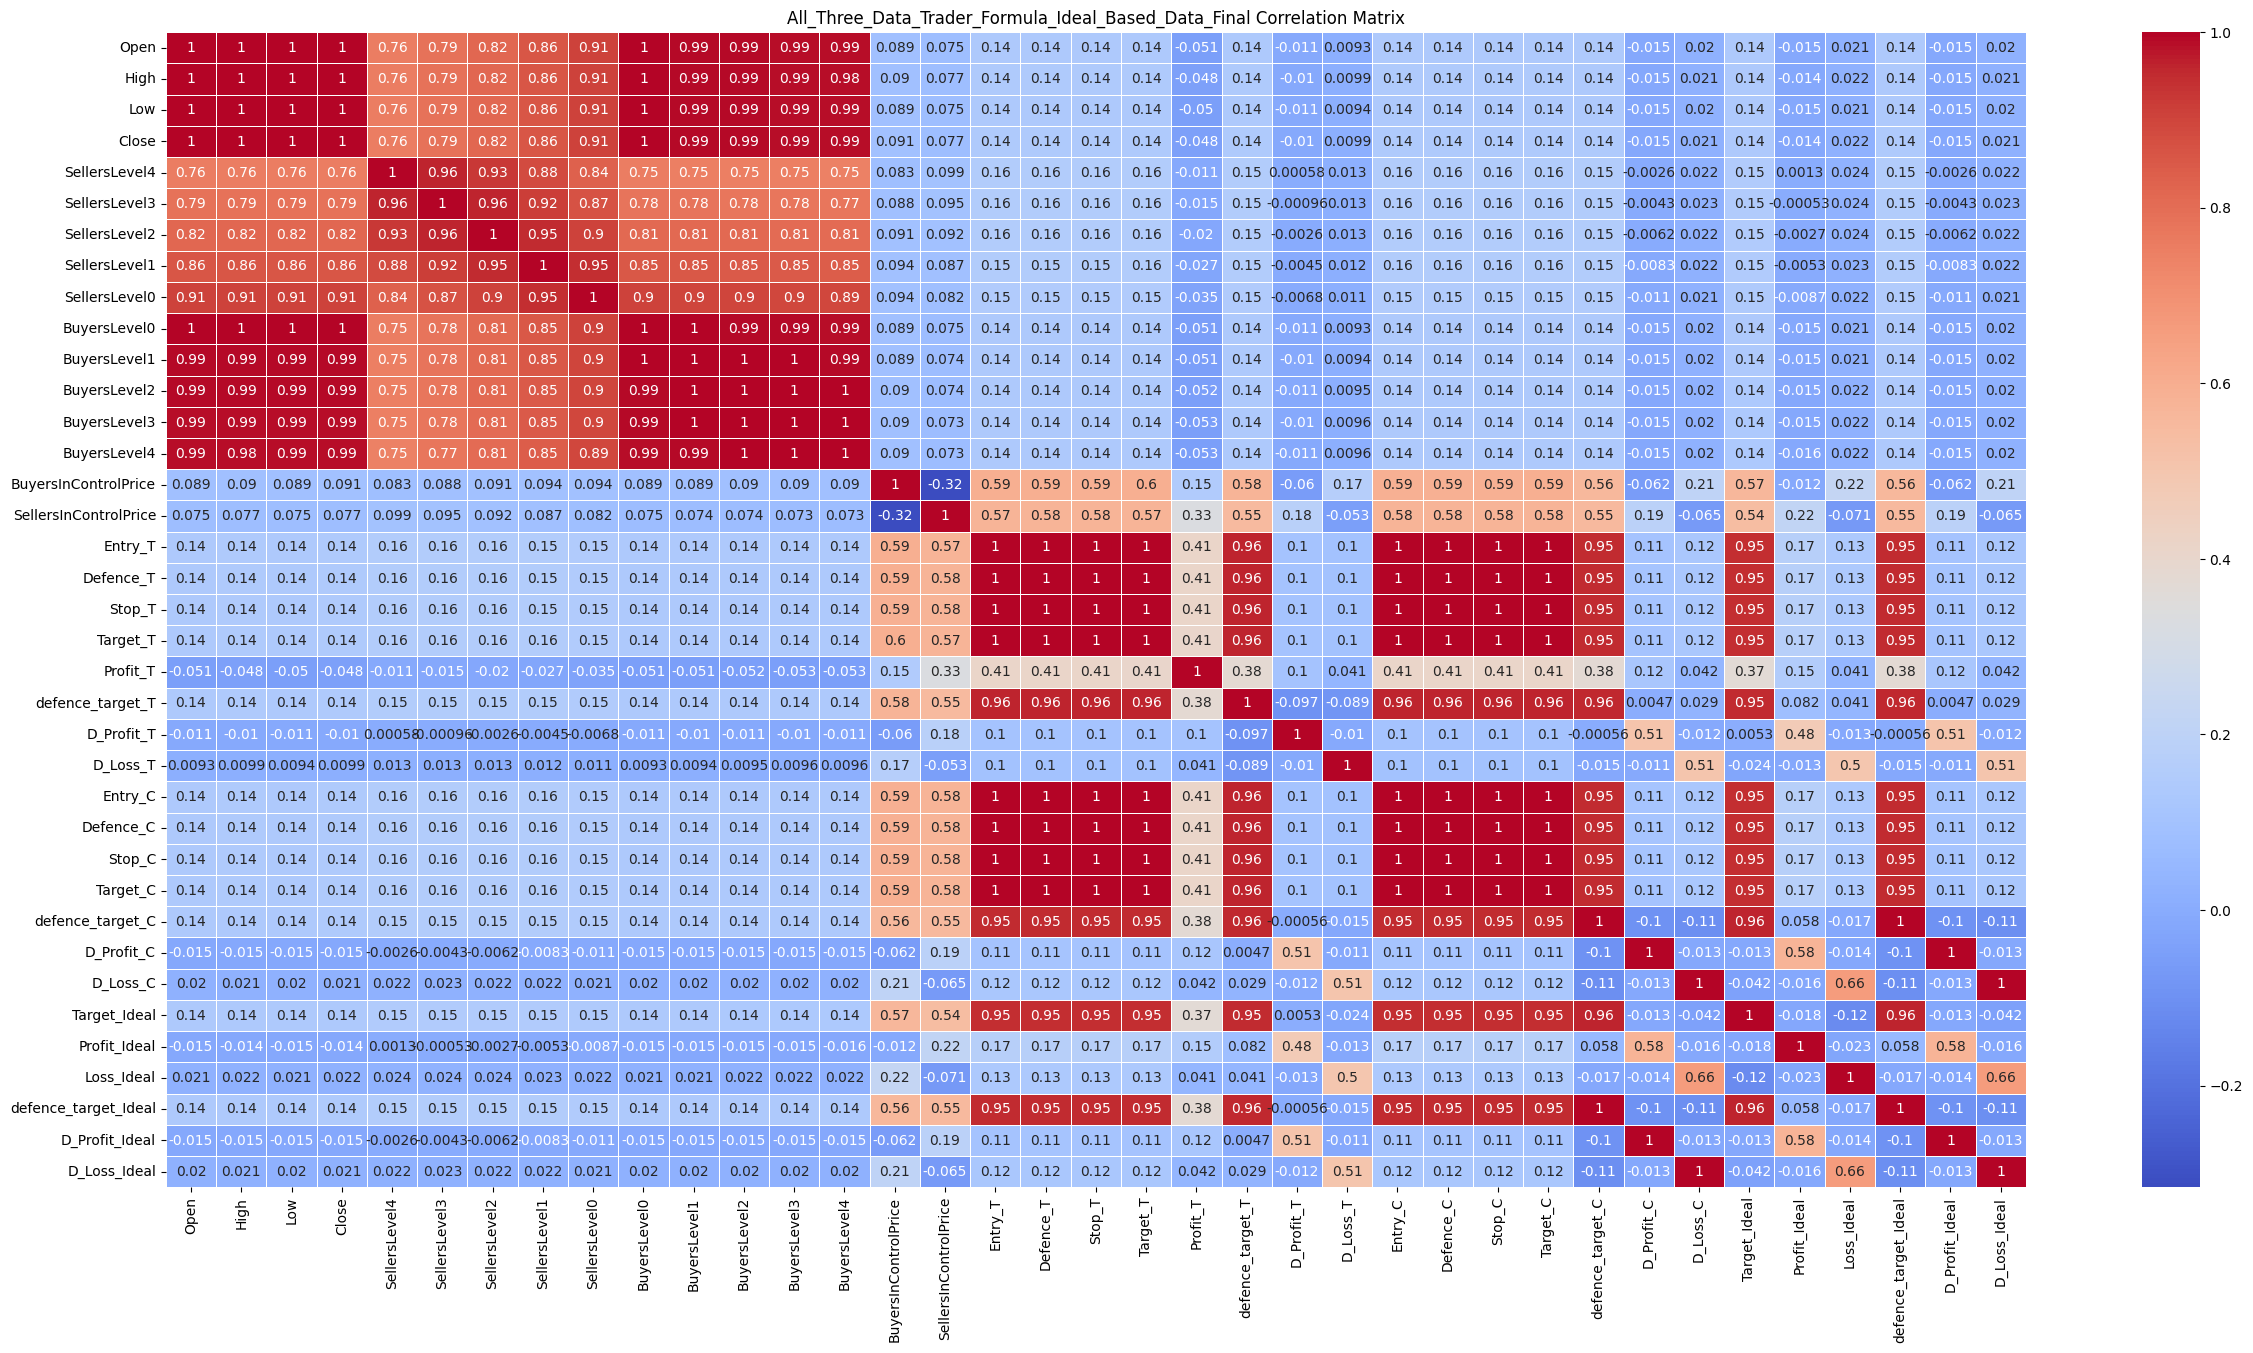

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def create_correlation_matrix(df, title="Correlation Matrix"):
    # Select only the numerical columns
    numerical_cols = df.select_dtypes(include=['float64']).columns

    # Create the correlation matrix
    corr_matrix = df[numerical_cols].corr()

    # Create the heatmap
    plt.figure(figsize=(30, 15))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title(title)
    plt.show()

# Example usage:
create_correlation_matrix(final_data, "All_Three_Data_Trader_Formula_Ideal_Based_Data_Final Correlation Matrix")

In [ ]:
# # import pandas as pd

# def calculate_correlation_matrix(data):
#     # Select only the numerical columns
#     numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns

#     # Create the correlation matrix
#     corr_matrix = data[numerical_cols].corr()

#     return corr_matrix

# def get_top_correlated_features(corr_matrix, target_column, top_n=15):
#     # Extract the correlation values for the target column
#     target_corr = corr_matrix[target_column].drop(target_column)

#     # Sort the correlations by absolute value in descending order
#     top_correlated_features = target_corr.abs().sort_values(ascending=False).head(top_n)

#     return top_correlated_features

# # Example usage:
# corr_matrix_t = calculate_correlation_matrix(final_data)

# # Assuming 'ideal_target' is the column of interest
# top_correlated_features = get_top_correlated_features(corr_matrix_t, 'Ideal_Target')

# print("Top 5 features most correlated with 'ideal_target':")
# print(top_correlated_features)


In [ ]:
# # Assuming 'ideal_target' is the column of interest
# top_correlated_features = get_top_correlated_features(corr_matrix_t, 'Target')

# print("Top 5 features most correlated with 'Target':")
# print(top_correlated_features)


In [ ]:
# # Assuming 'ideal_target' is the column of interest
# top_correlated_features = get_top_correlated_features(corr_matrix_t, 'Target_C')

# print("Top 5 features most correlated with 'Target_C':")
# print(top_correlated_features)
# #